# **Stock Prediction Model Using Tesla Stock Data**

This notebook demonstrates how to build a stock prediction model using the Tesla stock dataset. We will cover data loading, exploration, visualization, model building, and evaluation.

## **1. Importing Libraries**
We start by importing the necessary libraries for data manipulation, visualization, and model building.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error


## **2. Loading the Dataset**
Let's load the Tesla stock dataset and take a look at the first few rows.


In [2]:
# Load the dataset
df = pd.read_csv('TSLA.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


## **3. Data Exploration**
We will explore the dataset by checking for missing values, understanding the data types, and plotting the closing prices over time.


In [3]:
df.describe

<bound method NDFrame.describe of                    Open         High         Low        Close    Adj Close  \
Date                                                                         
2010-06-29     3.800000     5.000000    3.508000     4.778000     4.778000   
2010-06-30     5.158000     6.084000    4.660000     4.766000     4.766000   
2010-07-01     5.000000     5.184000    4.054000     4.392000     4.392000   
2010-07-02     4.600000     4.620000    3.742000     3.840000     3.840000   
2010-07-06     4.000000     4.000000    3.166000     3.222000     3.222000   
...                 ...          ...         ...          ...          ...   
2022-03-18   874.489990   907.849976  867.390015   905.390015   905.390015   
2022-03-21   914.979980   942.849976  907.090027   921.159973   921.159973   
2022-03-22   930.000000   997.859985  921.750000   993.979980   993.979980   
2022-03-23   979.940002  1040.699951  976.400024   999.109985   999.109985   
2022-03-24  1009.729980  1024.

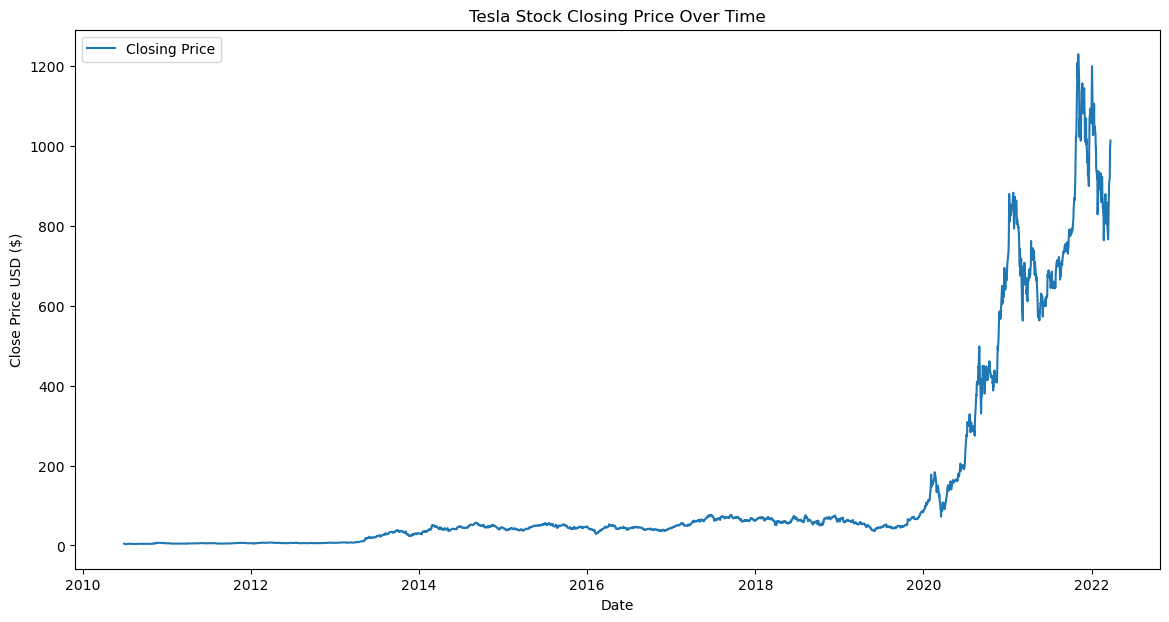

In [4]:
# Check for missing values
df.isnull().sum()

# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()


## **4. Data Preprocessing**
We will preprocess the data by selecting relevant features, scaling the data, and preparing it for the LSTM model.


In [5]:
# Select the closing price for prediction
data = df[['Close']]

# Scaling the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a dataset with a lookback of 60 days
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X, y = create_dataset(scaled_data, look_back)

# Reshape the input data to be compatible with LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [6]:
X

array([[[1.31893210e-03],
        [1.30915016e-03],
        [1.00427957e-03],
        ...,
        [8.57550414e-04],
        [8.10271019e-04],
        [6.63541861e-04]],

       [[1.30915016e-03],
        [1.00427957e-03],
        [5.54310154e-04],
        ...,
        [8.10271019e-04],
        [6.63541861e-04],
        [6.13001817e-04]],

       [[1.00427957e-03],
        [5.54310154e-04],
        [5.05400434e-05],
        ...,
        [6.63541861e-04],
        [6.13001817e-04],
        [7.01039312e-04]],

       ...,

       [[8.19816562e-01],
        [8.67201932e-01],
        [8.89162348e-01],
        ...,
        [6.82347631e-01],
        [7.07919260e-01],
        [7.35463615e-01]],

       [[8.67201932e-01],
        [8.89162348e-01],
        [8.84703437e-01],
        ...,
        [7.07919260e-01],
        [7.35463615e-01],
        [7.48318686e-01]],

       [[8.89162348e-01],
        [8.84703437e-01],
        [8.82844843e-01],
        ...,
        [7.35463615e-01],
        [7.4831

## **5. Splitting the Data**
We split the data into training and testing sets for model evaluation.


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X_train

array([[[0.8199307 ],
        [0.85477071],
        [0.86879962],
        ...,
        [0.70696553],
        [0.70202565],
        [0.71467698]],

       [[0.00120318],
        [0.00098961],
        [0.00098309],
        ...,
        [0.00193519],
        [0.00191563],
        [0.00176075]],

       [[0.05177094],
        [0.05093132],
        [0.05159975],
        ...,
        [0.04272264],
        [0.04288567],
        [0.04368616]],

       ...,

       [[0.03344936],
        [0.03365967],
        [0.03456613],
        ...,
        [0.03014632],
        [0.02932138],
        [0.02971755]],

       [[0.03903811],
        [0.03690728],
        [0.03504707],
        ...,
        [0.03416018],
        [0.0327206 ],
        [0.03314123]],

       [[0.01706949],
        [0.01811942],
        [0.01817485],
        ...,
        [0.031656  ],
        [0.03159568],
        [0.03290809]]])

## **6. Building the LSTM Model**
We build a Sequential LSTM model with multiple layers to predict the stock price.


In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


C:\Users\aryan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

## **7. Training the Model**
We train the LSTM model using the training data.


In [10]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20)


Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.0032
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 3.7303e-04
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 6.8453e-04
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 3.3251e-04
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.4638e-04
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 2.5235e-04
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 2.7949e-04
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 3.2042e-04
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 2.6319e-04
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 3.5629e-04
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 2.1324e-04
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.0147e-04
Epoch 13/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 1.9837e-04
Epoch 14/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.1002e-04
Epoch 15/20
73/73 

## **8. Evaluating the Model**
We evaluate the model's performance on the test set by predicting the stock prices and comparing them to the actual values.


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
Root Mean Squared Error: 14.78


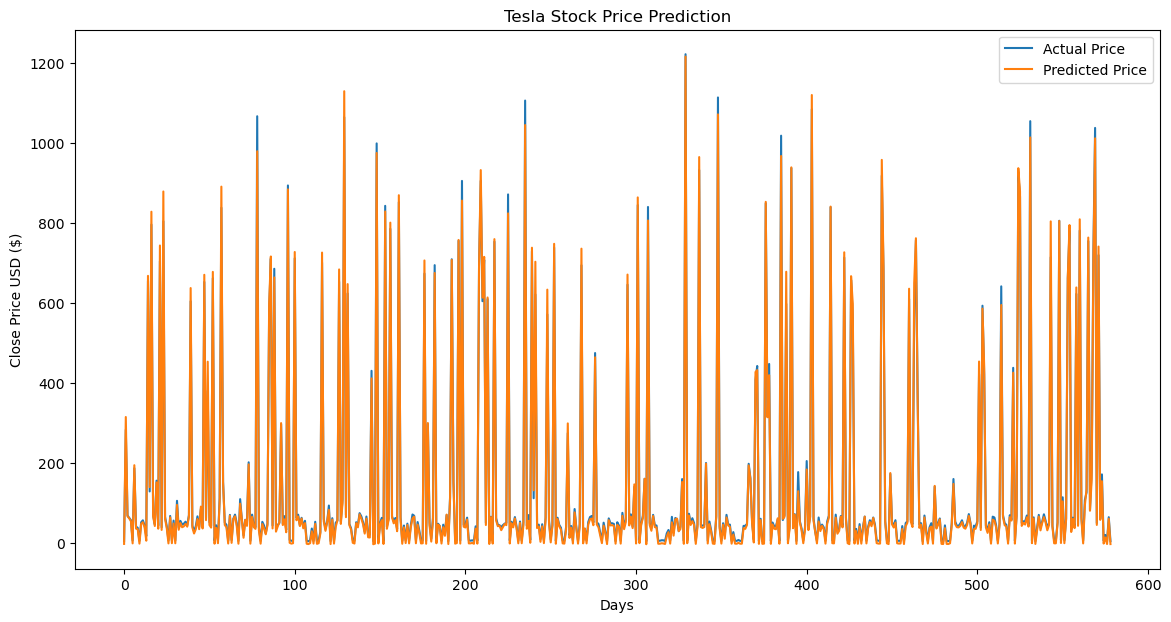

In [11]:
# Predict the stock prices
predictions = model.predict(X_test)

# Inverse transform the predictions to get the actual prices
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()


In [12]:
# Save the trained model to a file
model.save('stock_price_prediction_model.h5')


In [13]:
import tensorflow as tf

# Load the previously saved model
model = tf.keras.models.load_model('stock_price_prediction_model.h5')

# Use the model for predictions
predictions = model.predict(X)


91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions using the test data
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error (MSE): 0.00014518591949230487
Mean Absolute Error (MAE): 0.007310089499616975


In [16]:
from sklearn.metrics import r2_score

# Calculate R-squared (R²)
r2 = r2_score(y_test, predictions)
print("R-squared (R²):", r2)


R-squared (R²): 0.9967008223526186


In [17]:
import numpy as np

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.012049311992487575
